<a href="https://colab.research.google.com/github/alexandre-cameron-borges/ACBorges_Clickscore_SDUDAnalytics/blob/main/ACBorges_Clickscore_SDUDAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# 1) Cloner le repo & installer les outils
!git clone https://github.com/alexandre-cameron-borges/ACBorges_Clickscore_SDUDAnalytics.git
%cd ACBorges_Clickscore_SDUDAnalytics
!pip install -q -r requirements.txt nbstripout kaggle

# 2) Nettoyer les notebooks avant commit
!nbstripout --install

# 3) Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'ACBorges_Clickscore_SDUDAnalytics'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 322 (from 2)
Receiving objects: 100% (325/325), 412.50 KiB | 3.68 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/ACBorges_Clickscore_SDUDAnalytics
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# 0) Debug
!pip install -q 'jupyter-client<8.0.0'
!pip install -q 'torch==2.6.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.2/253.2 MB 9.6 MB/s eta 0:00:00


In [4]:
## A FAIRE QUE LA PREMIERE FOIS

# 4) Configurer l’API Kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/credentials/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 5) Créer le dossier raw
!mkdir -p /content/drive/MyDrive/data/raw

# 6) Télécharger & dézipper les jeux Kaggle
!kaggle datasets download -d amananandrai/clickbait-dataset \
    -p /content/drive/MyDrive/data/raw --unzip
!kaggle datasets download -d marius2303/ad-click-prediction-dataset \
    -p /content/drive/MyDrive/data/raw --unzip
!kaggle datasets download -d souvik1618/ad-click-prediction-dataset \
    -p /content/drive/MyDrive/data/raw --unzip

# 7) Télécharger + unzip Webis Clickbait Corpus 2017
!wget -q -O /content/drive/MyDrive/data/raw/clickbait17-train-170630.zip "https://zenodo.org/record/5530410/files/clickbait17-train-170630.zip?download=1"
!unzip -q /content/drive/MyDrive/data/raw/clickbait17-train-170630.zip -d /content/drive/MyDrive/data/raw/webis_clickbait
!rm /content/drive/MyDrive/data/raw/clickbait17-train-170630.zip

^C
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main


In [5]:
import pandas as pd

# Chemin vers le CSV amandarai clickbaitdataset dans ton Drive
pathtableclickbait_a = "/content/drive/MyDrive/data/raw/clickbait_data.csv"
tableclickbait_a = pd.read_csv(pathtableclickbait_a)

# Changement de la colonne de clickbait en Clickbait et des valeurs 0 en no-clickbait, 1 en clickbait et de headline en Texte
tableclickbait_a['clickbait'] = tableclickbait_a['clickbait'].map({1: 'clickbait', 0: 'no-clickbait'})
tableclickbait_a.rename(columns={'clickbait': 'Clickbait'}, inplace=True)
tableclickbait_a.rename(columns={'headline': 'Texte'}, inplace=True)


# Aperçu rapide
print("Shape :", tableclickbait_a.shape)
display(tableclickbait_a.head(8))

# Comptage des nulls et types
display(tableclickbait_a.info())
display(tableclickbait_a.isnull().sum())

# Répartition clickbait vs non-clickbait
counts = tableclickbait_a['Clickbait'].value_counts()
print(counts)



Shape : (32000, 2)


,Texte,Clickbait
0,Should I Get Bings,clickbait
1,Which TV Female Friend Group Do You Belong In,clickbait
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait
5,How To Flirt With Queer Girls Without Making A...,clickbait
6,32 Cute Things To Distract From Your Awkward T...,clickbait
7,If Disney Princesses Were From Florida,clickbait


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Texte      32000 non-null  object
 1   Clickbait  32000 non-null  object
dtypes: object(2)
memory usage: 500.1+ KB


None

,0
Texte,0
Clickbait,0


Clickbait
no-clickbait    16001
clickbait       15999
Name: count, dtype: int64


In [6]:
# Chemin vers le CSV marius clickbaitdataset dans ton Drive
pathtableclickbait_b = "/content/drive/MyDrive/data/raw/ad_click_dataset.csv"
tableclickbait_b = pd.read_csv(pathtableclickbait_b)

# Nettoyage des NaN et des Non-Binaire
tableclickbait_b = tableclickbait_b[tableclickbait_b['gender'].isin(['Male', 'Female'])]
tableclickbait_b = tableclickbait_b.dropna(subset=['age'])

# Changement colonne 'click' en 'clickbait' et les valeurs 0 en no-clickbait, 1 en clickbait
tableclickbait_b['click'] = tableclickbait_b['click'].map({1: 'clickbait', 0: 'no-clickbait'})
tableclickbait_b.rename(columns={'click': 'Clickbait'}, inplace=True)

# Aperçu rapide
print("Shape :", tableclickbait_b.shape)
display(tableclickbait_b.head(8))

# Comptage des nulls et types
display(tableclickbait_b.info())
display(tableclickbait_b.isnull().sum())

# Répartition clickbait vs non-clickbait
counts = tableclickbait_b['Clickbait'].value_counts()
print(counts)


Shape : (1972, 9)


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,Clickbait
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,clickbait
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,clickbait
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,no-clickbait
17,188,User188,56.0,Female,Tablet,Bottom,News,Morning,clickbait
25,4890,User4890,43.0,Male,Tablet,Bottom,Education,Afternoon,clickbait
27,5055,User5055,45.0,Male,NaN,NaN,Education,Morning,clickbait
28,6724,User6724,37.0,Female,NaN,Top,Entertainment,Evening,clickbait
31,1729,User1729,26.0,Female,Mobile,Top,NaN,Afternoon,clickbait


<class 'pandas.core.frame.DataFrame'>
Index: 1972 entries, 3 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1972 non-null   int64  
 1   full_name         1972 non-null   object 
 2   age               1972 non-null   float64
 3   gender            1972 non-null   object 
 4   device_type       1587 non-null   object 
 5   ad_position       1562 non-null   object 
 6   browsing_history  1098 non-null   object 
 7   time_of_day       1585 non-null   object 
 8   Clickbait         1972 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 154.1+ KB


None

,0
id,0
full_name,0
age,0
gender,0
device_type,385
ad_position,410
browsing_history,874
time_of_day,387
Clickbait,0


Clickbait
clickbait       1276
no-clickbait     696
Name: count, dtype: int64


In [7]:
# Chemin vers le CSV souvik clickbaitdataset dans ton Drive
pathtableclickbait_c = "/content/drive/MyDrive/data/raw/advertising.csv"
tableclickbait_c = pd.read_csv(pathtableclickbait_c)

# Changement colonne Male en Gender et les valeurs 0 en Female, 1 en Male et Ad Topic Line en Texte et Age en age
tableclickbait_c['Male'] = tableclickbait_c['Male'].map({1: 'Male', 0: 'Female'})
tableclickbait_c.rename(columns={'Male': 'gender'}, inplace=True)
tableclickbait_c.rename(columns={'Age': 'age'}, inplace=True)
tableclickbait_c.rename(columns={'Ad Topic Line': 'Texte'}, inplace=True)


# Changement colonne 'clicked on ad' en 'clickbait' et les valeurs 0 en no-clickbait, 1 en clickbait
tableclickbait_c['Clicked on Ad'] = tableclickbait_c['Clicked on Ad'].map({1: 'clickbait', 0: 'no-clickbait'})
tableclickbait_c.rename(columns={'Clicked on Ad': 'Clickbait'}, inplace=True)

# Aperçu rapide
print("Shape :", tableclickbait_c.shape)
display(tableclickbait_c.head(8))

# Comptage des nulls et types
display(tableclickbait_c.info())
display(tableclickbait_c.isnull().sum())

# Répartition clickbait vs non-clickbait
counts = tableclickbait_c['Clickbait'].value_counts()
print(counts)

Shape : (1000, 10)


,Daily Time Spent on Site,age,Area Income,Daily Internet Usage,Texte,City,gender,Country,Timestamp,Clickbait
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,no-clickbait
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,no-clickbait
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,no-clickbait
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,no-clickbait
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,no-clickbait
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19 14:30:17,no-clickbait
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,2016-01-28 20:59:32,no-clickbait
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,Male,Australia,2016-03-07 01:40:15,clickbait


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Texte                     1000 non-null   object 
 5   City                      1000 non-null   object 
 6   gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clickbait                 1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


None

,0
Daily Time Spent on Site,0
age,0
Area Income,0
Daily Internet Usage,0
Texte,0
City,0
gender,0
Country,0
Timestamp,0
Clickbait,0


Clickbait
no-clickbait    500
clickbait       500
Name: count, dtype: int64


In [8]:
# 1) Chemin vers fichier webis JSONL & 2) Charger le JSONL
pathtableclickbait_d = "/content/drive/MyDrive/data/raw/webis_clickbait/clickbait17-validation-170630/truth.jsonl"
pathtableclickbait_d2 = "/content/drive/MyDrive/data/raw/webis_clickbait/clickbait17-validation-170630/instances.jsonl"
tableclickbait_d = pd.read_json(pathtableclickbait_d, lines=True)
tableclickbait_d2 = pd.read_json(pathtableclickbait_d2, lines=True)

# Changement colonne 'truthClass' en 'clickbait' et targetTitle en Texte
tableclickbait_d.rename(columns={'truthClass': 'Clickbait'}, inplace=True)
tableclickbait_d2.rename(columns={'targetTitle': 'Texte'}, inplace=True)


# Aperçu rapide
print("Shape :", tableclickbait_d.shape)
display(tableclickbait_d.head(8))

print("Shape :", tableclickbait_d2.shape)
display(tableclickbait_d2.head(8))

# Comptage des nulls et types
display(tableclickbait_d.info())
display(tableclickbait_d.isnull().sum())

display(tableclickbait_d2.info())
display(tableclickbait_d2.isnull().sum())

# Répartition clickbait vs non-clickbait
counts = tableclickbait_d['Clickbait'].value_counts()
print(counts)

Shape : (19538, 6)


,truthJudgments,truthMean,id,Clickbait,truthMedian,truthMode
0,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,858464162594172928,clickbait,1.000000,1.000000
1,"[0.33333333330000003, 0.0, 0.33333333330000003...",0.133333,858462320779026432,no-clickbait,0.000000,0.000000
2,"[0.33333333330000003, 0.6666666666000001, 1.0,...",0.400000,858460992073863168,no-clickbait,0.333333,0.000000
3,"[0.0, 0.6666666666000001, 0.0, 0.3333333333000...",0.266667,858459539296980992,no-clickbait,0.333333,0.333333
4,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,858455355948384256,no-clickbait,0.000000,0.000000
5,"[0.0, 0.6666666666000001, 0.33333333330000003,...",0.200000,858453552892694528,no-clickbait,0.000000,0.000000
6,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,858450499921731584,no-clickbait,0.000000,0.000000
7,"[0.0, 0.0, 0.0, 0.6666666666000001, 0.0]",0.133333,858449569750896640,no-clickbait,0.000000,0.000000


Shape : (19538, 9)


,postMedia,postText,id,targetCaptions,targetParagraphs,Texte,postTimestamp,targetKeywords,targetDescription
0,[],[UK’s response to modern slavery leaving victi...,858462320779026432,[modern-slavery-rex.jpg],[Thousands of modern slavery victims have not ...,‘Inexcusable’ failures in UK’s response to mod...,Sat Apr 29 23:25:41 +0000 2017,"modern slavery, Department For Work And Pensio...",“Inexcusable” failures in the UK’s system for ...
1,[],[this is good],858421020331560960,"[In this July 1, 2010 file photo, Dr. Charmain...",[President Donald Trump has appointed the pro-...,Donald Trump Appoints Pro-Life Advocate as Ass...,Sat Apr 29 20:41:34 +0000 2017,"Americans United for Life, Dr. Charmaine Yoest...",President Donald Trump has appointed pro-life ...
2,[],"[The ""forgotten"" Trump roast: Relive his bruta...",858368123753435136,[President Trump will not attend this year's W...,[When the White House correspondents’ dinner i...,The ‘forgotten’ Trump roast: Relive his brutal...,Sat Apr 29 17:11:23 +0000 2017,"trump whcd, whcd, white house correspondents d...",President Trump won't be at this year's White ...
3,[],[Meet the happiest #dog in the world!],858323428260139008,"[Maru , Maru, Maru, Maru, Maru]",[Adorable is probably an understatement. This ...,"Meet The Happiest Dog In The World, Maru The H...",Sat Apr 29 14:13:46 +0000 2017,"Maru, husky, dogs, pandas, furball, instagram","The article is about Maru, a husky dog who has..."
4,[],[Tokyo's subway is shut down amid fears over a...,858283602626347008,[All nine lines of Tokyo's subway system were ...,[One of Tokyo's major subways systems says it ...,Tokyo's subway is shut down amid fears over an...,Sat Apr 29 11:35:31 +0000 2017,"Tokyo,subway,shut,fears,North,Korean,attack","The temporary suspension, which lasted ten min..."
5,[],[Ban lifted on Madrid doping laboratory],858224473597779968,"[Samples in an anti-doping laboratory, Anthony...","[Share this with, Madrid's Anti-Doping Laborat...",World Anti-Doping Agency lifts ban on Madrid l...,Sat Apr 29 07:40:34 +0000 2017,,Madrid's Anti-Doping Laboratory has its suspen...
6,[],"[Despite the ‘Yuck Factor,’ Leeches Are Big in...",858222698367000576,"[The New York Times, Basic, All Access, Home D...",[MOSCOW — They are small as physician assistan...,"Despite the ‘Yuck Factor,’ Leeches Are Big in ...",Sat Apr 29 07:33:30 +0000 2017,"Drugs (Pharmaceuticals),Medical Devices,Russia...",Russians use about 10 million leeches a year t...
7,[],[#China and #Pakistan have cemented their poli...,858191667739987968,[],[China and Pakistan have cemented their politi...,China And Pakistan Use Biryani To Take Their F...,Sat Apr 29 05:30:12 +0000 2017,"Pakistan, China, Biryani, CPEC, china pakistan...",China And Pakistan Use Biryani To Take Their F...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19538 entries, 0 to 19537
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   truthJudgments  19538 non-null  object 
 1   truthMean       19538 non-null  float64
 2   id              19538 non-null  int64  
 3   Clickbait       19538 non-null  object 
 4   truthMedian     19538 non-null  float64
 5   truthMode       19538 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 916.0+ KB


None

,0
truthJudgments,0
truthMean,0
id,0
Clickbait,0
truthMedian,0
truthMode,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19538 entries, 0 to 19537
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postMedia          19538 non-null  object
 1   postText           19538 non-null  object
 2   id                 19538 non-null  int64 
 3   targetCaptions     19538 non-null  object
 4   targetParagraphs   19538 non-null  object
 5   Texte              19538 non-null  object
 6   postTimestamp      19538 non-null  object
 7   targetKeywords     19538 non-null  object
 8   targetDescription  19538 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


None

,0
postMedia,0
postText,0
id,0
targetCaptions,0
targetParagraphs,0
Texte,0
postTimestamp,0
targetKeywords,0
targetDescription,0


Clickbait
no-clickbait    14777
clickbait        4761
Name: count, dtype: int64


In [9]:
#Filtre des colonnes utiles

cols_a   = ['Texte', 'Clickbait']
cols_b   = ['age', 'gender', 'Clickbait']
cols_c   = ['age', 'gender', 'Texte', 'Clickbait']
cols_d   = ['Clickbait', 'id']
cols_d2  = ['Texte', 'postMedia', 'id']

tableclickbait_a  = tableclickbait_a[cols_a]
tableclickbait_b  = tableclickbait_b[cols_b]
tableclickbait_c  = tableclickbait_c[cols_c]
tableclickbait_d  = tableclickbait_d[cols_d]
tableclickbait_d2 = tableclickbait_d2[cols_d2]

display(tableclickbait_a.head(5))
display(tableclickbait_b.head(5))
display(tableclickbait_c.head(5))
display(tableclickbait_d.head(5))
display(tableclickbait_d2.head(5))

,Texte,Clickbait
0,Should I Get Bings,clickbait
1,Which TV Female Friend Group Do You Belong In,clickbait
2,"The New ""Star Wars: The Force Awakens"" Trailer...",clickbait
3,"This Vine Of New York On ""Celebrity Big Brothe...",clickbait
4,A Couple Did A Stunning Photo Shoot With Their...,clickbait


,age,gender,Clickbait
3,34.0,Male,clickbait
6,26.0,Female,clickbait
7,40.0,Male,no-clickbait
17,56.0,Female,clickbait
25,43.0,Male,clickbait


,age,gender,Texte,Clickbait
0,35,Female,Cloned 5thgeneration orchestration,no-clickbait
1,31,Male,Monitored national standardization,no-clickbait
2,26,Female,Organic bottom-line service-desk,no-clickbait
3,29,Male,Triple-buffered reciprocal time-frame,no-clickbait
4,35,Female,Robust logistical utilization,no-clickbait


,Clickbait,id
0,clickbait,858464162594172928
1,no-clickbait,858462320779026432
2,no-clickbait,858460992073863168
3,no-clickbait,858459539296980992
4,no-clickbait,858455355948384256


,Texte,postMedia,id
0,‘Inexcusable’ failures in UK’s response to mod...,[],858462320779026432
1,Donald Trump Appoints Pro-Life Advocate as Ass...,[],858421020331560960
2,The ‘forgotten’ Trump roast: Relive his brutal...,[],858368123753435136
3,"Meet The Happiest Dog In The World, Maru The H...",[],858323428260139008
4,Tokyo's subway is shut down amid fears over an...,[],858283602626347008


In [10]:
#Fusion de D & D2 (Webis)

tableclickbait_dd2 = pd.merge(
    tableclickbait_d,
    tableclickbait_d2,
    on="id",
    how="inner"
)

#Filtre
cols_dd2  = ['Texte', 'Clickbait']
tableclickbait_dd2 = tableclickbait_dd2[cols_dd2]


display(tableclickbait_dd2.head(5))
display(tableclickbait_dd2.info())


,Texte,Clickbait
0,Facts That Will Be Truly Upsetting To '90s Girls,clickbait
1,‘Inexcusable’ failures in UK’s response to mod...,no-clickbait
2,Inside Kim Jong-un's camps of death: Former No...,no-clickbait
3,Trump Has Flip-Flopped. But His Supporters Are...,no-clickbait
4,Donald Trump said being US president was harde...,no-clickbait


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19538 entries, 0 to 19537
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Texte      19538 non-null  object
 1   Clickbait  19538 non-null  object
dtypes: object(2)
memory usage: 305.4+ KB


None

In [11]:
#Fusion de B & C

tableclickbait_bc = tableclickbait_b.merge(
    tableclickbait_c,
    on=["age", "gender", "Clickbait"],
    how="outer",
    suffixes=("_b", "_c")
)

display(tableclickbait_bc.head(5))
display(tableclickbait_bc.info())

,age,gender,Clickbait,Texte
0,18.0,Female,clickbait,NaN
1,18.0,Female,clickbait,NaN
2,18.0,Female,clickbait,NaN
3,18.0,Female,clickbait,NaN
4,18.0,Female,clickbait,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11229 non-null  float64
 1   gender     11229 non-null  object 
 2   Clickbait  11229 non-null  object 
 3   Texte      10802 non-null  object 
dtypes: float64(1), object(3)
memory usage: 351.0+ KB


None

In [12]:
# Fusion des tables A & D D2

tableclickbait_add2 = tableclickbait_a.merge(
    tableclickbait_dd2,
    on=["Texte", "Clickbait"],
    how="outer",
    suffixes=("_a", "_dd2")
)

display(tableclickbait_add2.head(10))
display(tableclickbait_add2.info())

,Texte,Clickbait
0,"!Sdrawkcab: Missy Elliott, the Beatles and the...",no-clickbait
1,"""Apprentice"" contestant sues Trump for defamation",no-clickbait
2,"""Big morale boost"": George H.W. Bush tweets im...",no-clickbait
3,"""Bring it on"": Students sue Trump administrati...",no-clickbait
4,"""Frat Lives Matter"" spray-painted on UConn cam...",no-clickbait
5,"""Giant hurricane"" on Saturn: First images from...",no-clickbait
6,"""God made me bulletproof,"" oft-shot rapper Yun...",no-clickbait
7,"""Just stop daddy"" children scream in 911 call ...",no-clickbait
8,"""Last Tango in Paris"" rape scene revelation sp...",no-clickbait
9,"""Moonlight"" writer on its origin and cirtical ...",no-clickbait


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51538 entries, 0 to 51537
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Texte      51538 non-null  object
 1   Clickbait  51538 non-null  object
dtypes: object(2)
memory usage: 805.4+ KB


None

In [13]:
# Fusion de toutes les tables A B C D D2

tableclickbait_abcdd2 = tableclickbait_add2.merge(
    tableclickbait_bc,
    on=["Texte", "Clickbait"],
    how="outer",
    suffixes=("_add2", "_bc")
)

display(tableclickbait_abcdd2.head(20))
display(tableclickbait_abcdd2.info())

,Texte,Clickbait,age,gender
0,"!Sdrawkcab: Missy Elliott, the Beatles and the...",no-clickbait,NaN,NaN
1,"""Apprentice"" contestant sues Trump for defamation",no-clickbait,NaN,NaN
2,"""Big morale boost"": George H.W. Bush tweets im...",no-clickbait,NaN,NaN
3,"""Bring it on"": Students sue Trump administrati...",no-clickbait,NaN,NaN
4,"""Frat Lives Matter"" spray-painted on UConn cam...",no-clickbait,NaN,NaN
5,"""Giant hurricane"" on Saturn: First images from...",no-clickbait,NaN,NaN
6,"""God made me bulletproof,"" oft-shot rapper Yun...",no-clickbait,NaN,NaN
7,"""Just stop daddy"" children scream in 911 call ...",no-clickbait,NaN,NaN
8,"""Last Tango in Paris"" rape scene revelation sp...",no-clickbait,NaN,NaN
9,"""Moonlight"" writer on its origin and cirtical ...",no-clickbait,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62767 entries, 0 to 62766
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Texte      62340 non-null  object 
 1   Clickbait  62767 non-null  object 
 2   age        11229 non-null  float64
 3   gender     11229 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


None

In [14]:
# 1) Chemin vers fichier webis JSONL & 2) Charger le JSONL
pathtableclickbait_e = "/content/drive/MyDrive/data/raw/mind/MINDlarge_train/behaviors.tsv"
pathtableclickbait_e2 = "/content/drive/MyDrive/data/raw/mind/MINDlarge_train/news.tsv"

tableclickbait_e = pd.read_csv(pathtableclickbait_e, sep='\t', header=None) # header=None to avoid first row as header
tableclickbait_e2 = pd.read_csv(pathtableclickbait_e2, sep='\t', header=None) # header=None to avoid first row as header

# Récupérer les colonnes d’indice 0 et 3 pour chacun
tableclickbait_e   = tableclickbait_e.iloc[:, 4]
tableclickbait_e2  = tableclickbait_e2.iloc[:, [0, 3]]

# Aperçu rapide
print("Shape :", tableclickbait_d.shape)
display(tableclickbait_e.head(8))

print("Shape :", tableclickbait_d2.shape)
display(tableclickbait_e2.head(8))

# Comptage des nulls et types
display(tableclickbait_e.info())
display(tableclickbait_e.isnull().sum())

display(tableclickbait_e2.info())
display(tableclickbait_e2.isnull().sum())

# Répartition clickbait vs non-clickbait
#counts = tableclickbait_e['Clickbait'].value_counts() # This line will likely cause an error
#print(counts)

Shape : (19538, 2)


,4
0,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,N103852-0 N53474-0 N127836-0 N47925-1
3,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...
5,N32154-0 N67747-0 N47257-0 N98178-1
6,N12681-0 N10802-0 N93856-0 N96729-0 N46415-0 N...
7,N98178-1 N32154-0


Shape : (19538, 3)


,0,3
0,N88753,"The Brands Queen Elizabeth, Prince Charles, an..."
1,N45436,Walmart Slashes Prices on Last-Generation iPads
2,N23144,50 Worst Habits For Belly Fat
3,N86255,Dispose of unwanted prescription drugs during ...
4,N93187,The Cost of Trump's Aid Freeze in the Trenches...
5,N75236,I Was An NBA Wife. Here's How It Affected My M...
6,N99744,"How to Get Rid of Skin Tags, According to a De..."
7,N5771,Check Houston traffic map for current road con...


<class 'pandas.core.series.Series'>
RangeIndex: 2232748 entries, 0 to 2232747
Series name: 4
Non-Null Count    Dtype 
--------------    ----- 
2232748 non-null  object
dtypes: object(1)
memory usage: 17.0+ MB


None

np.int64(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       101527 non-null  object
 1   3       101527 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


None

,0
0,0
3,0


                                                title       ctr
0   Steelers Injury Report: 3 players out for Thur...  0.390909
1   Browns, Steelers brawl at end of Cleveland's 2...  0.380702
2       Broadway Actress Laurel Griggs Dies at Age 13  0.363035
3   Warrant: Neighbor of Taylor Williams says she ...  0.361386
4   Heyman: Brewers interested in Yasmani Grandal,...  0.357143
5   Bengals cut candidates who could follow Presto...  0.327684
6   Broadway Star Laurel Griggs Suffered Asthma At...  0.321585
7   After stunning loss, Michigan State's Mark Dan...  0.316239
8   Free Fight! Blachowicz Flatlines Rockhold In V...  0.309701
9   Carlos Condit forced out of fight against Mick...  0.308511
10  Rip Taylor's Cause of Death Revealed, Memorial...  0.296864
11  Nate Diaz questions Jorge Masvidal's desire to...  0.281818
12  Opinions | We thought Trump was the biggest co...  0.278727
13  Shamrock scoffs at 'BMF title': You wear glove...  0.266667
14  Russell Wilson, Richard Sherman swap

None

,0
title,0
ctr,0


ctr
0.000000    359
0.028571     21
0.020000     20
0.043478     18
0.050000     18
           ... 
0.041535      1
0.041549      1
0.041551      1
0.041560      1
0.041451      1
Name: count, Length: 6855, dtype: int64
1er quartile (25 %) : 0.014
2ᵉ quartile (médiane) : 0.028
3ᵉ quartile (75 %) : 0.051


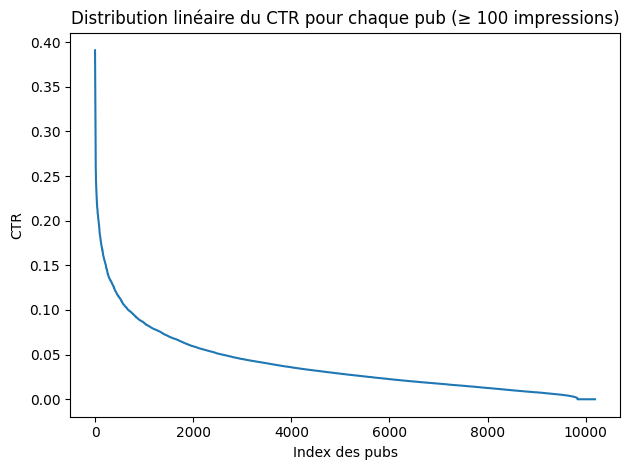

In [15]:

# --- 1) Raw impressions Series
raw = tableclickbait_e.astype(str)

# --- 2) Décomposer en (ad_id, clicked)
tokens = (
    raw.str
       .split()                      # sépare sur espace
       .explode()                    # 1 token par ligne
       .str.split('-', expand=True)  # sépare ID et click
       .rename(columns={0:"ad_id", 1:"clicked"})
)
tokens["clicked"] = tokens["clicked"].astype(int)

# --- 3) Aggréger pour calculer impressions & CTR
ctr_df = (
    tokens.groupby("ad_id")["clicked"]
          .agg(impressions="size", ctr="mean")
          .reset_index()
)

# --- 4) Fusionner avec la table des pubs (ID en colonne 0 de tableclickbait_e2)
result = (
    tableclickbait_e2
      .merge(ctr_df, left_on=tableclickbait_e2.columns[0], right_on="ad_id", how="left")
      .drop(columns="ad_id")
)

# 4,5) Remplacer les NaN
result["impressions"] = result["impressions"].fillna(0).astype(int)
result["ctr"]         = result["ctr"].fillna(0.0)

# --- 5) (Optionnel) Renommer pour plus de lisibilité
result.columns = ["news_id", "title", "impressions", "ctr"]

# --- 2) Filtrer pour ne garder que les pubs vues au moins une fois ---
result_seen = result[result["impressions"] > 0].reset_index(drop=True)

# 2) Tri par CTR décroissant
result_seen_sorted = result_seen.sort_values("ctr", ascending=False).reset_index(drop=True)


# À partir de result_seen_sorted trié par CTR
result_top100 = result_seen_sorted[result_seen_sorted["impressions"] >= 100] \
                   .reset_index(drop=True)

result_top100 = result_top100[['title', 'ctr']]

# Aperçu
print((result_top100).head(20))
display(result_top100.info())
display(result_top100.isnull().sum())

counts_ctr = result_top100['ctr'].value_counts()
print(counts_ctr)

q1, q2, q3 = result_top100['ctr'].quantile([0.25, 0.50, 0.75])
print(f"1er quartile (25 %) : {q1:.3f}")
print(f"2ᵉ quartile (médiane) : {q2:.3f}")
print(f"3ᵉ quartile (75 %) : {q3:.3f}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(result_top100['ctr'])
plt.xlabel('Index des pubs')
plt.ylabel('CTR')
plt.title('Distribution linéaire du CTR pour chaque pub (≥ 100 impressions)')
plt.tight_layout()
plt.show()



In [16]:
# Cellule 11: Nettoyage & features simples
df = tableclickbait_abcdd2.dropna(subset=['Texte']).copy()

# Label binaire
df['label'] = df['Clickbait'].map({'clickbait':1,'no-clickbait':0})

# Imputation et normalisation de l'âge
med = df['age'].median()
df['age'] = df['age'].fillna(med)
df['age_norm'] = (df['age'] - med) / (df['age'].max() - med)

# Genre manquant → 'Unknown', puis encodage
df['gender'] = df['gender'].fillna('Unknown')
df['gender_id'] = df['gender'].astype('category').cat.codes

# Vérification rapide
print("Après nettoyage :", df.shape)
display(df[['Texte','label','age_norm','gender_id']].head())
display(df.value_counts('label'))


Après nettoyage : (62340, 7)


,Texte,label,age_norm,gender_id
0,"!Sdrawkcab: Missy Elliott, the Beatles and the...",0,0.0,2
1,"""Apprentice"" contestant sues Trump for defamation",0,0.0,2
2,"""Big morale boost"": George H.W. Bush tweets im...",0,0.0,2
3,"""Bring it on"": Students sue Trump administrati...",0,0.0,2
4,"""Frat Lives Matter"" spray-painted on UConn cam...",0,0.0,2


,count
label,
0,34440
1,27900


In [17]:
# Cellule 12: train/test split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    stratify=df['label'],
    test_size=0.2,
    random_state=42
)

print("Train:", train_df.shape, "– Val:", val_df.shape)


Train: (49872, 7) – Val: (12468, 7)


In [18]:
# 1) Créer un petit DataFrame de « bruit » courts, label=0
shorts = ["..", ",,", "zzz", "?!", "  ", "test"] * 2000
df_bruit = pd.DataFrame({
    "Texte": shorts,
    "label": [0]*len(shorts),
    "age_norm": 0.0,
    "gender_id": 2
})
# 2) Concatène-le à ton df existant
train_df = pd.concat([train_df, df_bruit], axis=0).reset_index(drop=True)


In [19]:
# Cellule 13: Dataset & DataLoader
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

class CB_Dataset(Dataset):
    def __init__(self, df):
        self.texts   = df["Texte"].tolist()
        self.ages    = df["age_norm"].tolist()
        self.genders = df["gender_id"].tolist()
        self.labels  = df["label"].tolist()
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, i):
        enc = tokenizer(
            self.texts[i],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        return {
            "input_ids":      enc.input_ids.squeeze(0),
            "attention_mask": enc.attention_mask.squeeze(0),
            "age":            torch.tensor(self.ages[i],    dtype=torch.float),
            "gender":         torch.tensor(self.genders[i], dtype=torch.long),
            "label":          torch.tensor(self.labels[i],  dtype=torch.float)
        }

train_loader = DataLoader(CB_Dataset(train_df), batch_size=16, shuffle=True)
val_loader   = DataLoader(CB_Dataset(val_df),   batch_size=16)
print("Batches train:", len(train_loader), " – val :", len(val_loader))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Batches train: 3867  – val : 780


In [20]:
# Cellule 14 – Modèle Clickbait + entraînement amélioré
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel, get_linear_schedule_with_warmup
from sklearn.metrics import f1_score
from tqdm.auto import tqdm

# 1) Choix du device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2) Architecture du modèle avec dropout renforcé
class ClickbaitModel(nn.Module):
    def __init__(self, n_genders):
        super().__init__()
        self.bert       = BertModel.from_pretrained("bert-base-multilingual-cased")
        self.age_fc     = nn.Linear(1, 16)
        self.gender_emb = nn.Embedding(n_genders, 8)
        hid = self.bert.config.hidden_size + 16 + 8
        self.head = nn.Sequential(
            nn.Linear(hid, 64),
            nn.ReLU(),
            nn.Dropout(0.3),      # Dropout augmenté
            nn.Linear(64, 1)
        )
    def forward(self, input_ids, attention_mask, age, gender):
        out = self.bert(input_ids, attention_mask).pooler_output
        a   = F.relu(self.age_fc(age.unsqueeze(1)))
        g   = self.gender_emb(gender)
        x   = torch.cat([out, a, g], dim=1)
        return self.head(x).squeeze(-1)

# 3) Instanciation
model = ClickbaitModel(n_genders=train_df['gender_id'].nunique()).to(device)

# 4) Hyperparamètres, rééquilibrage et scheduler
num_epochs  = 5
total_steps = len(train_loader) * num_epochs

neg_ratio  = 1 - train_df['label'].mean()
pos_ratio  = train_df['label'].mean()
pos_weight = torch.tensor([neg_ratio / pos_ratio], device=device)  # ×2?

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=2e-5,
    weight_decay=0.01      # weight decay ajouté
)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.2 * total_steps),  # warm-up 20%
    num_training_steps=total_steps
)

# 5) Boucle d’entraînement + early stopping
best_f1, patience = 0, 0
for epoch in range(num_epochs):
    model.train()
    train_bar = tqdm(train_loader, desc=f"Train Ep{epoch+1}", leave=False)
    for batch in train_bar:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        logits = model(batch['input_ids'], batch['attention_mask'], batch['age'], batch['gender'])
        loss   = criterion(logits, batch['label'])
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    model.eval()
    val_bar = tqdm(val_loader, desc=f" Val Ep{epoch+1}", leave=False)
    preds, truths = [], []
    with torch.no_grad():
        for batch in val_bar:
            batch  = {k: v.to(device) for k, v in batch.items()}
            logits = model(batch['input_ids'], batch['attention_mask'], batch['age'], batch['gender'])
            preds  += torch.sigmoid(logits).round().cpu().tolist()
            truths += batch['label'].cpu().tolist()
    val_f1 = f1_score(truths, preds)
    print(f"Epoch {epoch+1}/{num_epochs} — F1 val: {val_f1:.3f}")

    if val_f1 > best_f1:
        best_f1, patience = val_f1, 0
        torch.save(model.state_dict(), "best_cb_model.pt")
    else:
        patience += 1
        if patience >= 3:  # patience accrue
            print("Early stopping triggered.")
            break

print("Meilleur F1 obtenu :", best_f1)


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Train Ep1:   0%|          | 0/3867 [00:00<?, ?it/s]

 Val Ep1:   0%|          | 0/780 [00:00<?, ?it/s]

Epoch 1/5 — F1 val: 0.873


Train Ep2:   0%|          | 0/3867 [00:00<?, ?it/s]

 Val Ep2:   0%|          | 0/780 [00:00<?, ?it/s]

Epoch 2/5 — F1 val: 0.907


Train Ep3:   0%|          | 0/3867 [00:00<?, ?it/s]

 Val Ep3:   0%|          | 0/780 [00:00<?, ?it/s]

Epoch 3/5 — F1 val: 0.904


Train Ep4:   0%|          | 0/3867 [00:00<?, ?it/s]

 Val Ep4:   0%|          | 0/780 [00:00<?, ?it/s]

Epoch 4/5 — F1 val: 0.917


Train Ep5:   0%|          | 0/3867 [00:00<?, ?it/s]

 Val Ep5:   0%|          | 0/780 [00:00<?, ?it/s]

Epoch 5/5 — F1 val: 0.914
Meilleur F1 obtenu : 0.9173583543846987


              precision    recall  f1-score   support

         0.0     0.9167    0.9493    0.9327      6888
         1.0     0.9346    0.8935    0.9136      5580

    accuracy                         0.9244     12468
   macro avg     0.9257    0.9214    0.9232     12468
weighted avg     0.9247    0.9244    0.9242     12468

Confusion matrix:
 [[6539  349]
 [ 594 4986]]


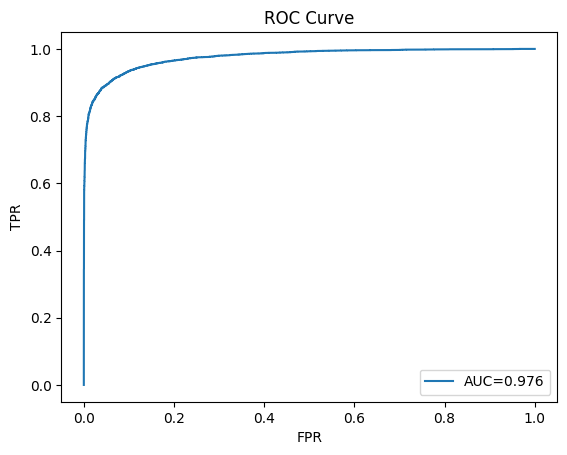

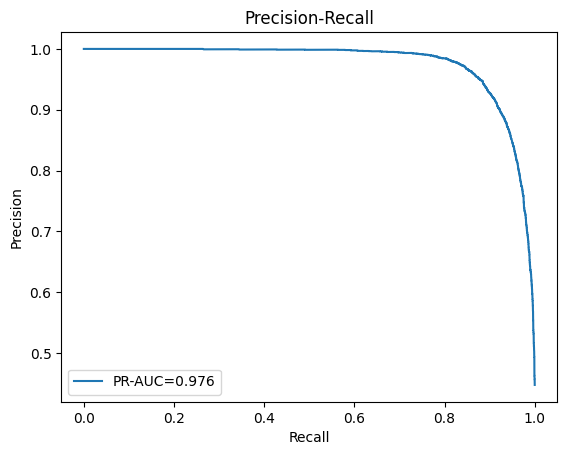

In [21]:
# 1) Récupérer toutes les prédictions & probas
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import torch

model.eval()
probs, truths = [], []
with torch.no_grad():
    for batch in val_loader:
        batch = {k:v.to(device) for k,v in batch.items()}
        logits = model(batch['input_ids'], batch['attention_mask'],
                       batch['age'], batch['gender'])
        probs += torch.sigmoid(logits).cpu().tolist()
        truths += batch['label'].cpu().tolist()

preds = [1 if p>=0.7 else 0 for p in probs]

# 2) Classification report & matrice de confusion
print(classification_report(truths, preds, digits=4))
cm = confusion_matrix(truths, preds)
print("Confusion matrix:\n", cm)

# 3) Courbe ROC
fpr, tpr, _ = roc_curve(truths, probs)
roc_auc = auc(fpr, tpr)
plt.figure(); plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend(); plt.show()

# 4) Courbe Precision-Recall
prec, rec, _ = precision_recall_curve(truths, probs)
pr_auc = auc(rec, prec)
plt.figure(); plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}"); plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall"); plt.legend(); plt.show()


In [22]:
!pip install huggingface_hub
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `2` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `2`


In [23]:
import os
from huggingface_hub import HfApi
from google.colab import userdata


token = userdata.get('HUGGINGFACE_TOKEN')  # lit automatiquement ta variable d'env
api   = HfApi(token=token)               # tu passes maintenant le token ici

# 1) Créer le repo (pas besoin de repasser token)
api.create_repo(
    repo_id="alexandre-cameron-borges/clickbait-model",
    private=True,
    exist_ok=True
)

# 2) Uploader le .pt
api.upload_file(
    path_or_fileobj="best_cb_model.pt",
    path_in_repo="best_cb_model.pt",
    repo_id="alexandre-cameron-borges/clickbait-model"
)


best_cb_model.pt:   0%|          | 0.00/712M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/alexandre-cameron-borges/clickbait-model/commit/2a874690ef7d4842e7fb3d5e69dcff7f26f02efd', commit_message='Upload best_cb_model.pt with huggingface_hub', commit_description='', oid='2a874690ef7d4842e7fb3d5e69dcff7f26f02efd', pr_url=None, repo_url=RepoUrl('https://huggingface.co/alexandre-cameron-borges/clickbait-model', endpoint='https://huggingface.co', repo_type='model', repo_id='alexandre-cameron-borges/clickbait-model'), pr_revision=None, pr_num=None)

In [24]:
#CTR modèle

from sklearn.model_selection import train_test_split

# result_top100 contient [‘title’, ‘ctr’]
train_ctr_df, val_ctr_df = train_test_split(
    result_top100, test_size=0.2, random_state=42
)
print("CTR train:", train_ctr_df.shape, "– CTR val:", val_ctr_df.shape)


CTR train: (8151, 2) – CTR val: (2038, 2)


In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

class CTR_Dataset(Dataset):
    def __init__(self, df):
        self.texts = df["title"].tolist()
        self.targets = df["ctr"].tolist()
    def __len__(self):
        return len(self.targets)
    def __getitem__(self, i):
        enc = tokenizer(
            self.texts[i], padding="max_length", truncation=True,
            max_length=128, return_tensors="pt"
        )
        return {
            "input_ids": enc.input_ids.squeeze(0),
            "attention_mask": enc.attention_mask.squeeze(0),
            "ctr": torch.tensor(self.targets[i], dtype=torch.float)
        }

train_ctr_loader = DataLoader(CTR_Dataset(train_ctr_df), batch_size=16, shuffle=True)
val_ctr_loader   = DataLoader(CTR_Dataset(val_ctr_df),   batch_size=16)


In [26]:
import torch.nn as nn, torch.nn.functional as F

class CTRModel(nn.Module):
    def __init__(self):
        super().__init__()
        from transformers import BertModel
        self.bert = BertModel.from_pretrained("bert-base-multilingual-cased")
        h = self.bert.config.hidden_size
        self.head = nn.Sequential(
            nn.Linear(h, 64), nn.ReLU(), nn.Dropout(0.1),
            nn.Linear(64, 1)
        )
    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids, attention_mask).pooler_output
        logits = self.head(out_bert).squeeze(-1)
        probabilities = torch.sigmoid(logits) # <--- VOICI L'AJOUT
        return probabilities

device_ctr     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ctr_model  = CTRModel().to(device)


In [27]:
# Cellule X – Modèle CTR + entraînement amélioré
import torch
import torch.nn as nn
from tqdm.auto import tqdm
from transformers import BertModel, get_linear_schedule_with_warmup
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1) Architecture avec dropout renforcé
class CTRModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-multilingual-cased")
        hid = self.bert.config.hidden_size
        self.head = nn.Sequential(
            nn.Linear(hid, 64),
            nn.ReLU(),
            nn.Dropout(0.2),    # dropout ↑
            nn.Linear(64, 1)
        )
    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids, attention_mask).pooler_output
        return self.head(out).squeeze(-1)

ctr_model = CTRModel().to(device)

# --- 2) Hyper-paramètres & scheduler
num_epochs    = 5
patience_max  = 3
learning_rate = 2e-5
total_steps   = len(train_ctr_loader) * num_epochs

optimizer_ctr = torch.optim.AdamW(
    ctr_model.parameters(),
    lr=learning_rate,
    weight_decay=0.01    # weight decay ajouté
)
scheduler_ctr = get_linear_schedule_with_warmup(
    optimizer_ctr,
    num_warmup_steps=int(0.2 * total_steps),  # warm-up 20%
    num_training_steps=total_steps
)

criterion = nn.SmoothL1Loss()  # huber-like

# --- 3) TensorBoard
writer = SummaryWriter(log_dir="runs/ctr_experiment")

best_rmse = float('inf')
patience  = 0
step      = 0

for epoch in range(1, num_epochs+1):
    # Entraînement
    ctr_model.train()
    bar = tqdm(train_ctr_loader, desc=f"Train Ep{epoch}", leave=False)
    for batch in bar:
        optimizer_ctr.zero_grad()
        inputs = batch["input_ids"].to(device)
        masks  = batch["attention_mask"].to(device)
        targets= batch["ctr"].to(device)

        preds = ctr_model(inputs, masks)
        loss  = criterion(preds, targets)
        loss.backward()
        optimizer_ctr.step()
        scheduler_ctr.step()

        writer.add_scalar("train/loss", loss.item(), step)
        step += 1
        bar.set_postfix(loss=f"{loss.item():.4f}")

    # Validation
    ctr_model.eval()
    all_preds, all_trues = [], []
    with torch.no_grad():
        for batch in val_ctr_loader:
            inputs = batch["input_ids"].to(device)
            masks  = batch["attention_mask"].to(device)
            targets= batch["ctr"].to(device)
            preds = ctr_model(inputs, masks)
            all_preds.extend(preds.cpu().tolist())
            all_trues.extend(targets.cpu().tolist())

    mse  = mean_squared_error(all_trues, all_preds)
    rmse = mse ** 0.5
    mae  = mean_absolute_error(all_trues, all_preds)

    writer.add_scalar("val/rmse", rmse, epoch)
    writer.add_scalar("val/mae", mae, epoch)
    print(f"Epoch {epoch}: Val RMSE={rmse:.4f}, MAE={mae:.4f}")

    # Early stopping & checkpoint
    if rmse < best_rmse:
        best_rmse = rmse
        patience  = 0
        torch.save(ctr_model.state_dict(), "best_ctr_model.pt")
    else:
        patience += 1
        if patience >= patience_max:
            print("Early stopping triggered.")
            break

writer.close()


Train Ep1:   0%|          | 0/510 [00:00<?, ?it/s]

Epoch 1: Val RMSE=0.0393, MAE=0.0252


Train Ep2:   0%|          | 0/510 [00:00<?, ?it/s]

Epoch 2: Val RMSE=0.0378, MAE=0.0250


Train Ep3:   0%|          | 0/510 [00:00<?, ?it/s]

Epoch 3: Val RMSE=0.0376, MAE=0.0251


Train Ep4:   0%|          | 0/510 [00:00<?, ?it/s]

Epoch 4: Val RMSE=0.0378, MAE=0.0249


Train Ep5:   0%|          | 0/510 [00:00<?, ?it/s]

Epoch 5: Val RMSE=0.0379, MAE=0.0254


In [28]:
import os
from huggingface_hub import HfApi
from google.colab import userdata


token = userdata.get('HUGGINGFACE_TOKEN')  # lit automatiquement ta variable d'env
api   = HfApi(token=token)               # tu passes maintenant le token ici

# 1) Créer le repo (pas besoin de repasser token)
api.create_repo(
    repo_id="alexandre-cameron-borges/ctr-model",
    private=True,
    exist_ok=True
)

# 2) Uploader le .pt
api.upload_file(
    path_or_fileobj="best_ctr_model.pt",
    path_in_repo="best_ctr_model.pt",
    repo_id="alexandre-cameron-borges/ctr-model"
)


best_ctr_model.pt:   0%|          | 0.00/712M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/alexandre-cameron-borges/ctr-model/commit/dd338b156fd8abb341febfad6181b2a608cc76b4', commit_message='Upload best_ctr_model.pt with huggingface_hub', commit_description='', oid='dd338b156fd8abb341febfad6181b2a608cc76b4', pr_url=None, repo_url=RepoUrl('https://huggingface.co/alexandre-cameron-borges/ctr-model', endpoint='https://huggingface.co', repo_type='model', repo_id='alexandre-cameron-borges/ctr-model'), pr_revision=None, pr_num=None)

In [29]:
import nbformat, json, os

path = "ACBorges_Clickscore_SDUDAnalytics.ipynb"   # <-- adapte le nom

nb = nbformat.read(path, as_version=nbformat.NO_CONVERT)

if "widgets" in nb.metadata:
    # ① soit on ajoute la clé manquante
    nb.metadata["widgets"]["state"] = nb.metadata["widgets"].get("state", {})
    # ② ou, si les widgets sont inutiles sur GitHub, on les enlève :
    # nb.metadata.pop("widgets")

nbformat.write(nb, path)
print("✅ Notebook corrigé, tu peux le re-commiter.")

✅ Notebook corrigé, tu peux le re-commiter.
